# Data Visualization

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/cleaned_data.csv')

In [ ]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Reason of Failure
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0
...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0
9996,3,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0
9998,3,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0


## **VISUALIZATIONS**

## **1. Distribution of Failure Reasons**


Graph: Pie chart for Reason of Failure

<ipython-input-5-8d2a80feb9f4>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(failure_counts))(range(len(failure_counts)))


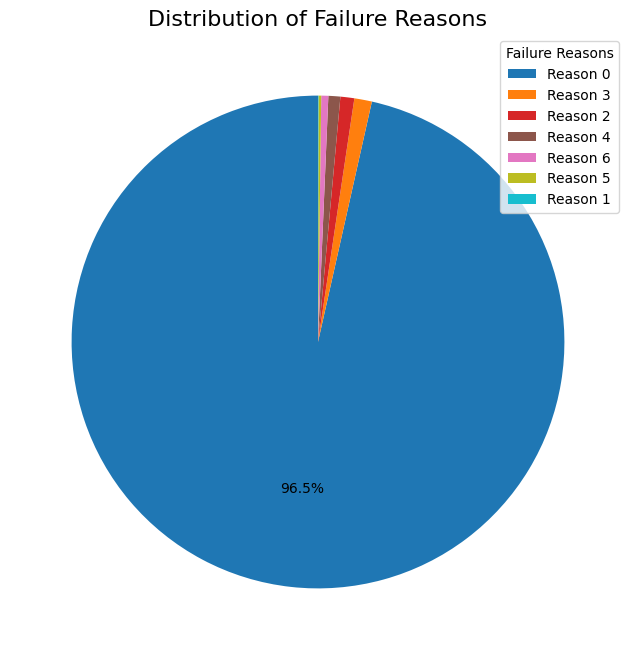

In [ ]:
from matplotlib import cm

failure_counts = df['Reason of Failure'].value_counts()

colors = cm.get_cmap('tab10', len(failure_counts))(range(len(failure_counts)))

def autopct_function(pct, all_vals):
    absolute = int(round(pct * sum(all_vals) / 100.0))
    return f'{pct:.1f}%' if absolute == max(all_vals) else ''

plt.figure(figsize=(8, 8))
plt.pie(
    failure_counts,
    labels=None,
    autopct=lambda pct: autopct_function(pct, failure_counts),
    startangle=90,
    colors=colors
)
plt.title('Distribution of Failure Reasons', fontsize=16)
plt.legend(
    labels=[f'Reason {reason}' for reason in failure_counts.index],
    title="Failure Reasons",
    loc="upper right"
)
plt.show()


### **Insight:** The pie chart visually shows the proportion of each failure reason in the dataset, highlighting the dominance of non-failure cases (likely 0) and the relative proportions of other failure reasons.


## **2. Correlation Heatmap**
Graph: Correlation matrix

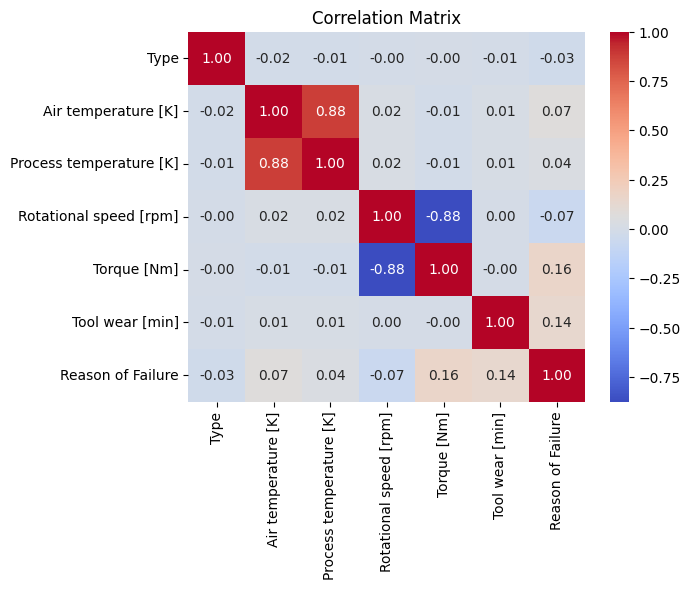

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### **Insight:** Strong correlations between Air temperature and Process temperature indicate a potential dependency in the operational conditions.

## **3. Air Temperature vs Process Temperature**
Graph: Scatterplot

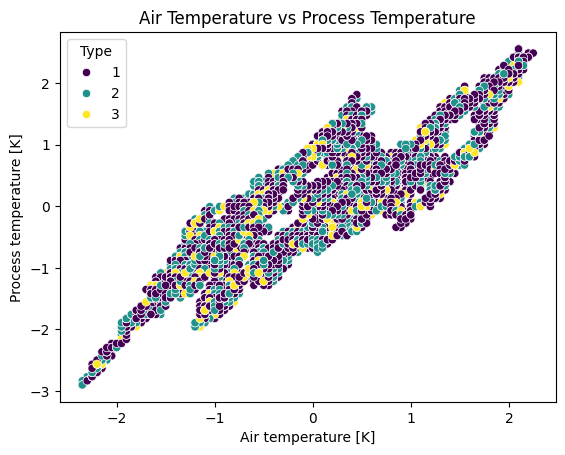

In [ ]:
sns.scatterplot(data=df, x='Air temperature [K]', y='Process temperature [K]', hue='Type', palette='viridis')
plt.title('Air Temperature vs Process Temperature')
plt.show()

### **Insight:** There is a linear relationship between air and process temperatures across different machine types.

## **4. Rotational Speed Distribution by Failure Reason**
Graph: Violin plot

<ipython-input-8-c15bc902152b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Reason of Failure', y='Rotational speed [rpm]', palette='Set2', inner='quartile')


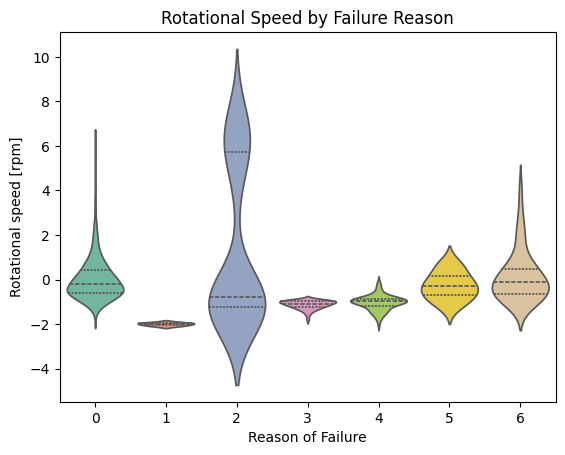

In [ ]:
sns.violinplot(data=df, x='Reason of Failure', y='Rotational speed [rpm]', palette='Set2', inner='quartile')
plt.title('Rotational Speed by Failure Reason')
plt.show()

### **Insight:** Machines with certain failure reasons (other than 0) exhibit distinct rotational speed ranges, which might indicate stress points.

## **5. Torque Distribution by Machine Type**
Graph: KDE plot

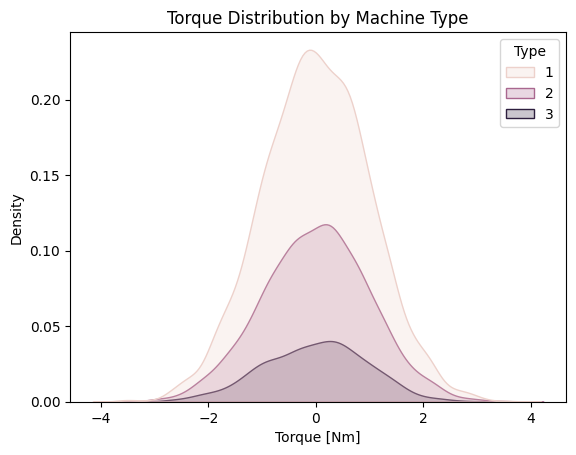

In [ ]:
sns.kdeplot(data=df, x='Torque [Nm]', hue='Type', fill=True)
plt.title('Torque Distribution by Machine Type')
plt.xlabel('Torque [Nm]')
plt.show()

### **Insight:** Machines of different types exhibit overlapping but distinct torque distributions, suggesting design or usage variations.

## **6. Relationship Between Rotational Speed and Torque**
Graph: Joint plot

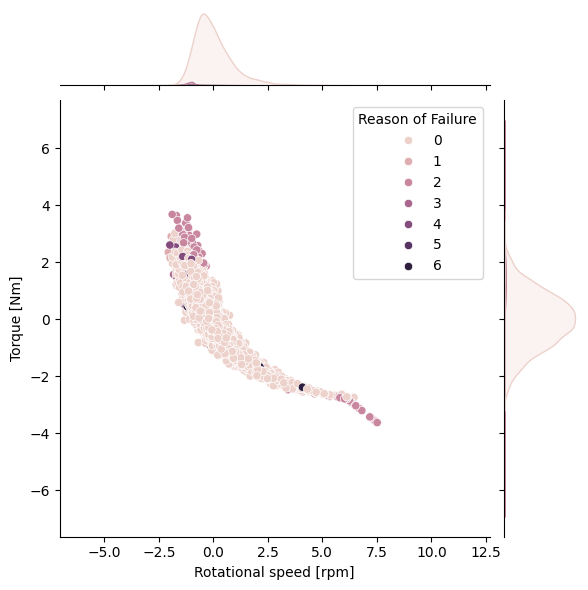

In [ ]:
sns.jointplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Reason of Failure', kind='scatter')
plt.show()

### **Insight:** Certain combinations of rotational speed and torque are more associated with failures, which can guide predictive modeling.

## **7. Pair plot of features**
Graph: Pair plot

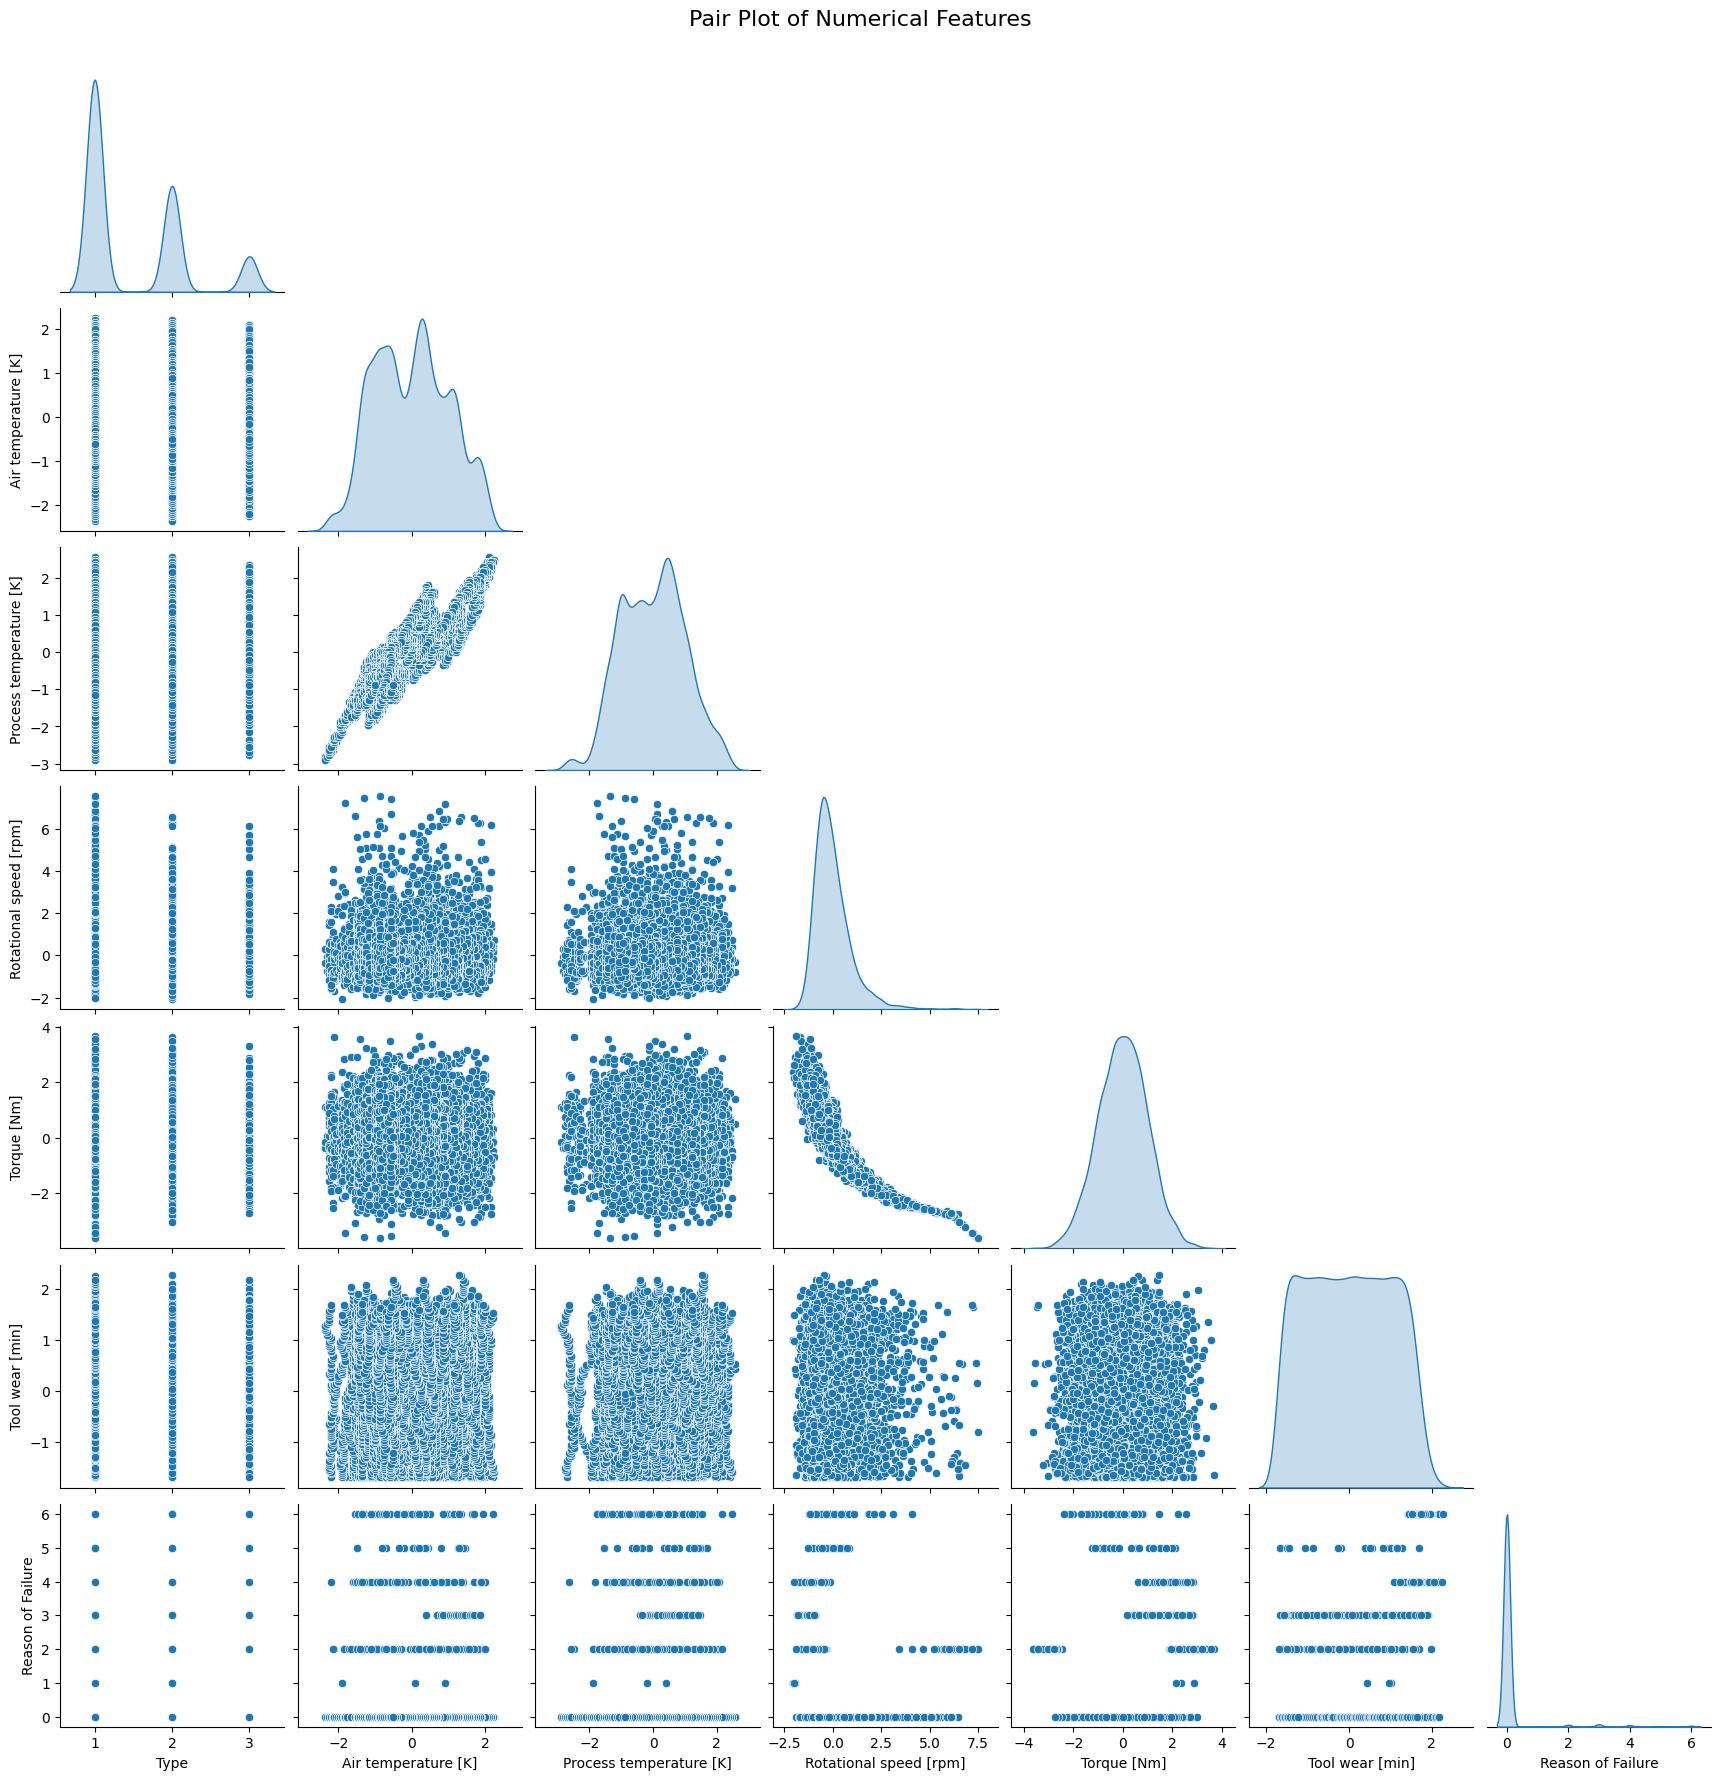

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True, height=2.5)

plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()

### **Insight:** This plot provides an overview of pairwise relationships between numerical features, making it easier to identify patterns, clusters, or correlations in the data.

## **8. Torque vs Rotational speed**
Graph: Bubble chart

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


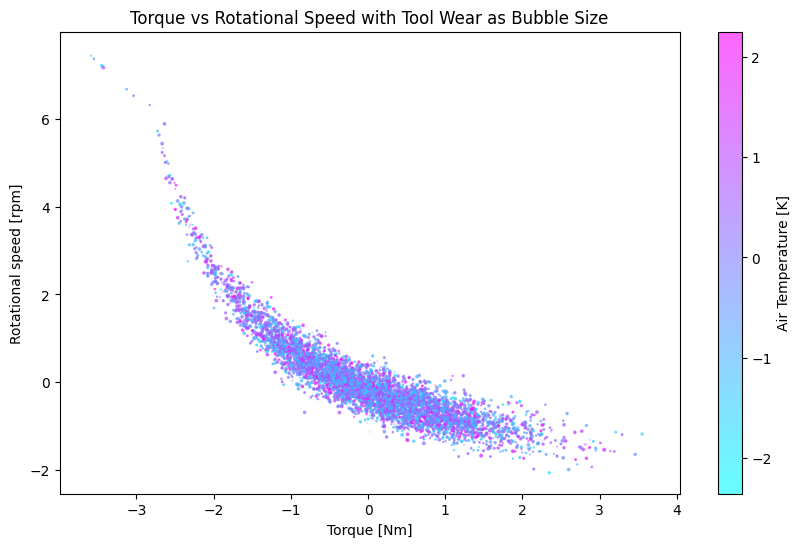

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Torque [Nm]'], df['Rotational speed [rpm]'],
            s=df['Tool wear [min]']*2, alpha=0.6, c=df['Air temperature [K]'], cmap='cool')
plt.colorbar(label='Air Temperature [K]')
plt.title('Torque vs Rotational Speed with Tool Wear as Bubble Size')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.show()


### **Insight:** Useful for comparing multiple variables simultaneously.

## **9. Parallel Coordinates**
Graph: Parallel coordinates plot




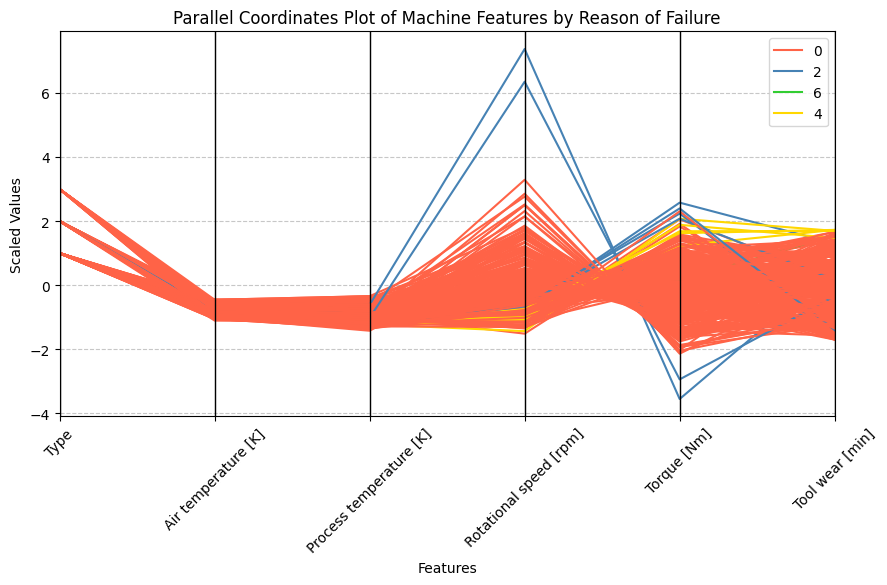

In [ ]:
plt.figure(figsize=(10, 5))
parallel_coordinates(df.head(300), 'Reason of Failure', color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9400D3'])

plt.title('Parallel Coordinates Plot of Machine Features by Reason of Failure')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Insight:** This visualization shows how different features (on the x-axis) vary for each Reason of Failure (grouped by color). It helps identify trends, clusters, or outliers across multiple dimensions.


